In [25]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers
import tensorflow as tf

2022-10-24 16:17:00.472524: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-24 16:17:07.857253: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2022-10-24 16:17:07.857836: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2022-10-24 16:17:07.903568: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2022-10-24 16:17:28.386099: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


In [10]:
def ellipse(t, a, b, x0, y0):
    x = x0 + a*np.cos(t)
    y = x0 + b*np.sin(t)
    return x, y


def rotate(x, y, alph):
    x_ans = x*np.cos(alph) - y*np.sin(alph)
    y_ans = x*np.sin(alph) + y*np.cos(alph)
    return x_ans, y_ans

In [19]:
t = np.linspace(0, 2*np.pi, 200)
x1, y1 = ellipse(t, 0.4, 0.15, 0, 0)
x1, y1 = rotate(x1, y1, np.pi / 6)

x2, y2 = ellipse(t, 0.7, 0.5, 0, 0)
x2, y2 = rotate(x2, y2, - np.pi / 3)

x3, y3 = ellipse(t, 1, 1, 0, 0)

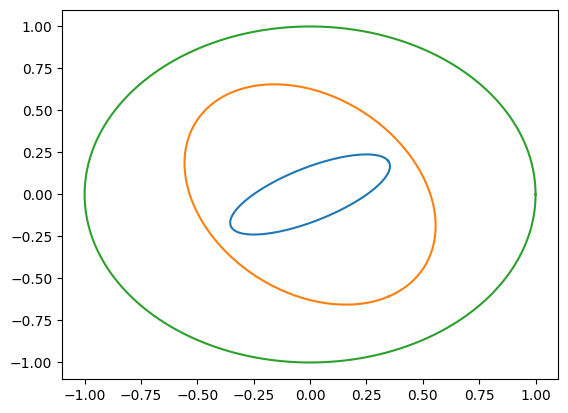

In [20]:
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)

In [22]:
data1 = [[cords, [1, 0, 0]] for cords in zip(x1, y1)]
data2 = [[cords, [0, 1, 0]] for cords in zip(x2, y2)]
data3 = [[cords, [0, 0, 1]] for cords in zip(x3, y3)]
dataset = data1 + data2 + data3

In [24]:
train_X = [x[0] for x in dataset]
train_y = [x[1] for x in dataset]

In [ ]:
predictor =  keras.Sequential([
        layers.Dense(1,input_dim=D, activation="linear", name="pred"),
    ]
)
opt = keras.optimizers.SGD(learning_rate=0.1)
predictor.compile(loss='mse', optimizer=opt, metrics=['mae'])